In [1]:
import pandas
import requests
import io
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]

In [2]:
dataset_urls = {
    'world_deaths': 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
    'us_deaths': 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv',
    'us_confirmed_cases': 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv',
    'world_confirmed_cases': 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
}

In [3]:
datasets = {k: pandas.read_csv(io.StringIO(requests.get(v).text)) for k,v in dataset_urls.items()}

In [4]:
datasets['world_deaths']

Province/State         Country/Region        Lat       Long  1/22/20  \
0              NaN            Afghanistan  33.000000  65.000000        0   
1              NaN                Albania  41.153300  20.168300        0   
2              NaN                Algeria  28.033900   1.659600        0   
3              NaN                Andorra  42.506300   1.521800        0   
4              NaN                 Angola -11.202700  17.873900        0   
..             ...                    ...        ...        ...      ...   
261            NaN         Western Sahara  24.215500 -12.885800        0   
262            NaN  Sao Tome and Principe   0.186360   6.613081        0   
263            NaN                  Yemen  15.552727  48.516388        0   
264            NaN                Comoros -11.645500  43.333300        0   
265            NaN             Tajikistan  38.861034  71.276093        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/2/20  5/3/20  5/4/20  \
0          0        0        0        0        0  ...      72      85      90   
1          0        0        0        0        0  ...      31      31      31   
2          0        0        0        0        0  ...     459     463     465   
3          0        0        0        0        0  ...      44      45      45   
4          0        0        0        0        0  ...       2       2       2   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
261        0        0        0        0        0  ...       0       0       0   
262        0        0        0        0        0  ...       1       1       3   
263        0        0        0        0        0  ...       2       2       2   
264        0        0        0        0        0  ...       0       0       0   
265        0        0        0        0        0  ...       2       2       3   

     5/5/20  5/6/20  5/7/20  5/8/20  5/9/20  5/10/20  5/11/20  
0        95     104     106     109     115      120      122  
1        31      31      31      31      31       31       31  
2       470     476     483     488     494      502      507  
3        46      46      47      47      48       48       48  
4         2       2       2       2       2        2        2  
..      ...     ...     ...     ...     ...      ...      ...  
261       0       0       0       0       0        0        0  
262       3       3       4       5       5        5        5  
263       4       5       5       7       7        8        9  
264       0       1       1       1       1        1        1  
265       5       8      12      12      20       20       21  

[266 rows x 115 columns]

In [5]:
def date_frames(dataframe):
    '''
    Get only the dataframe columns of data that have dates as headers
    '''
    date_cols = [c for c in dataframe if len(c.split('/')) > 2] # only cells with more than 1 / in them
    return dataframe[date_cols]

def plot_perday(dataframe, axs):
    '''
    The data is in cummulative deaths instead of per day reports. We will get the difference between each row 
    and then sum those differences to get the deaths per day
    '''
    dataframe.diff(axis=1).sum().plot(ax=axs)
    
def plot_cumday(dataframe, axs):
    dataframe.sum().plot(ax=axs)

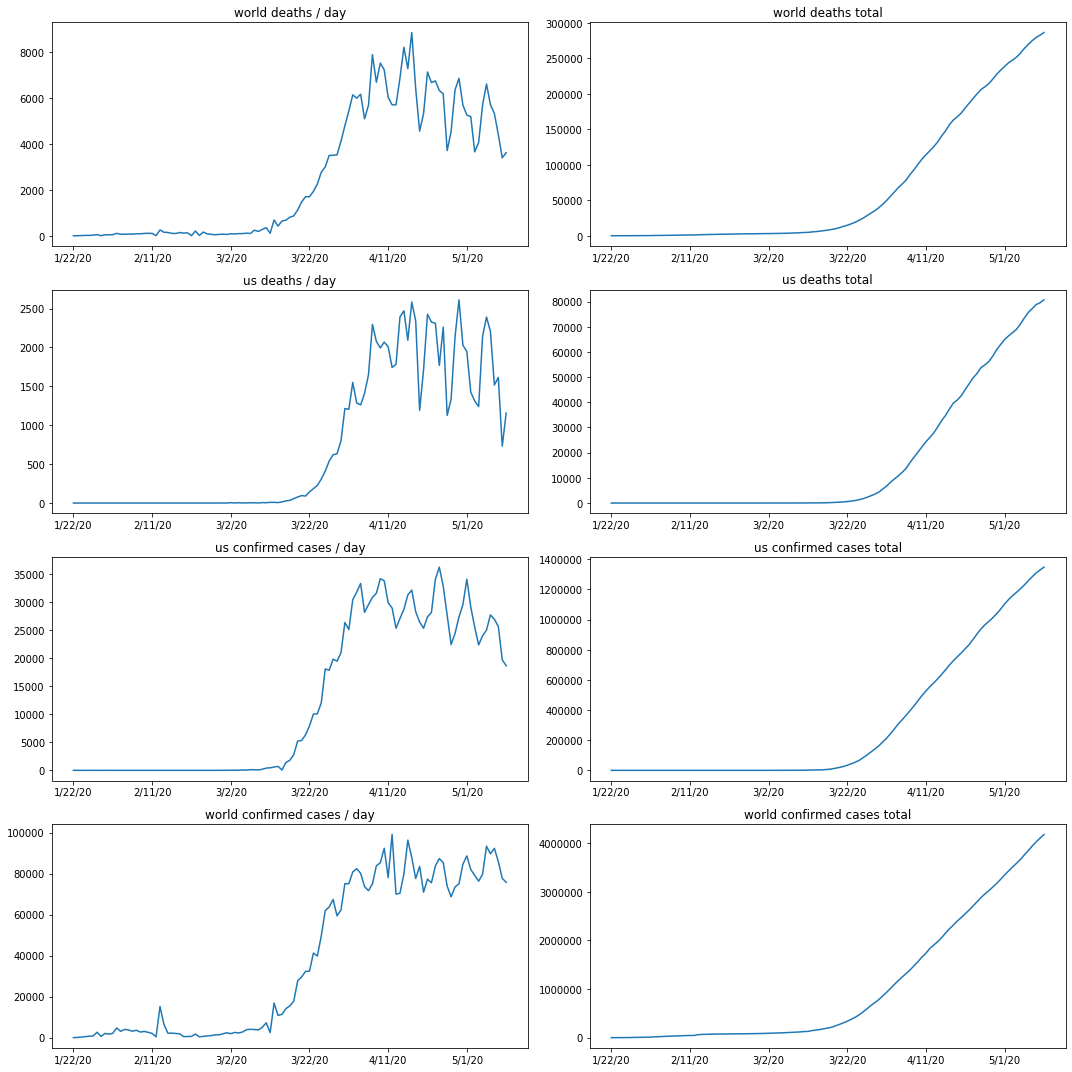

In [6]:
fig, axs = plt.subplots(len(datasets), 2)
for items, ax in zip(datasets.items(), axs):
    title, dataframe = items
    dframe = date_frames(dataframe)
    ax[0].set_title(title.replace('_', ' ') + ' / day')
    plot_perday(dframe, ax[0])
    ax[1].set_title(title.replace('_', ' ') + ' total')
    plot_cumday(dframe, ax[1])
    
plt.tight_layout()